<a href="https://colab.research.google.com/github/karthikmnkrishna/Loan-default-prediction/blob/Build/Loan_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAN CASE STUDY

##DATA & LIBRARIES IMPORT

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import norm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
path = '/content/drive/My Drive/Masters/loan.csv'
df = pd.read_csv(path)
print(df.shape)

(39717, 111)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## DATA CLEANING AND FORMATING

###Checking if there is any incosistency in column names

In [81]:
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

The column names have no formating issue

Checking for columns that have only a single value,and hence may not be considered for analysis

In [82]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.0000

In [83]:
df.groupby(['acc_now_delinq','application_type','collections_12_mths_ex_med','initial_list_status','policy_code','pymnt_plan','chargeoff_within_12_mths','delinq_amnt','tax_liens']).count()['id']

acc_now_delinq  application_type  collections_12_mths_ex_med  initial_list_status  policy_code  pymnt_plan  chargeoff_within_12_mths  delinq_amnt  tax_liens
0               INDIVIDUAL        0.0                         f                    1            n           0.0                       0            0.0          39661
Name: id, dtype: int64

In [0]:
df.drop(['acc_now_delinq','collections_12_mths_ex_med','initial_list_status','policy_code','application_type','pymnt_plan','chargeoff_within_12_mths','delinq_amnt','tax_liens','url'] ,axis = 1,inplace= True) #REMOVING URL, AS IT SEEMS TO BE A REPITION OF ID COLUMN 

Setting index as id . it seems to be the primary keys as it has all unique values and the description vouches our assumption

In [0]:
df.set_index('id',inplace =True)

###Checking Rows for redundancy/inconsistency

In [86]:
pd.set_option("max_colwidth", None)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay towa

Both the header and footer look fine.There are no extra rows.

###TREATING MISSING VALUES

Lets oserve all the columns with non null and null values and get rid of the columns with only null

In [87]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   member_id                       39717 non-null  int64  
 1   loan_amnt                       39717 non-null  int64  
 2   funded_amnt                     39717 non-null  int64  
 3   funded_amnt_inv                 39717 non-null  float64
 4   term                            39717 non-null  object 
 5   int_rate                        39717 non-null  object 
 6   installment                     39717 non-null  float64
 7   grade                           39717 non-null  object 
 8   sub_grade                       39717 non-null  object 
 9   emp_title                       37258 non-null  object 
 10  emp_length                      38642 non-null  object 
 11  home_ownership                  39717 non-null  object 
 12  annual_inc               

COLUMNS WITH ONLY NULL VALUES HAVE BEEN REMOVED.<br>
COLUMNS WITH TOO MANY NULL VALUES HAVE BEEN REMOVED (next_pymnt_d)<br>
ROWS WITH MINIMUM NULL VALUES  HAVE BEEN IGNORED IN SOME CASES<br>

In [0]:
df.drop([ 'annual_inc_joint', 'dti_joint','mths_since_last_major_derog',
 'verification_status_joint','tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75',   'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd','tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit','next_pymnt_d','mths_since_last_record'  ],axis =1,inplace = True)

In [0]:
df = df[~df.title.isna()]
#df = df[~df.pub_rec_bankruptcies.isna()]
df = df[~df.last_pymnt_d.isna()]
df = df[~df.last_credit_pull_d.isna()] 

Cleaning Columns and Rows - after removing the null values <br>CLEANING DESC COLUMN AND FORMATING INTEREST RATE ,ZIP CODE ,Term and other date columns<br>
I'm surious to know if  emp_title or emp_length will give any thing interesting when it is not given.

In [0]:
df.desc.fillna(' ' ,inplace= True)
df.revol_util.fillna(-1 ,inplace= True)#reomve if not useful
df.mths_since_last_delinq.fillna(-1 ,inplace= True)#reomve if not useful
df.emp_title.fillna('Not Given' ,inplace= True)#reomve if not useful
df.emp_length.fillna('Not Given' ,inplace= True)#reomve if not useful
df['desc'] = df.desc.str.replace('<br>' , '')
df['desc'] =df.desc.str.replace('Borrower added on ' , '')
df['desc'] = df.desc.str.replace('(1[0-2]|0[1-9])/(3[01]|[12][0-9]|0[1-9])/(1[0-2]|0[1-9])' , '')
df['desc'] =df.desc.str.replace('>' ,'')

In [0]:
df['int_rate'] = df.int_rate.apply(lambda x : float(x.strip('%'))/100 )
df['revol_util'] = df.revol_util.apply(lambda x : float(x.strip('%'))/100 if (x != -1 ) else -1) # -1 so that we can regonize the columns and ignore if necessary

In [0]:
df['zip_code'] = df.zip_code.str.replace('xx' ,'')

In [0]:
df['term']= df.term.str.strip()

In [0]:
df['last_credit_pull_d'] =df.last_credit_pull_d.apply(lambda x : datetime.datetime.strptime(x, '%b-%y') if pd.isnull(x) == False else  datetime.date(9999, 12,31) )
df['issue_d'] =df.issue_d.apply(lambda x : datetime.datetime.strptime(x, '%b-%y') if pd.isnull(x) == False else  datetime.date(9999, 12,31) )
df['earliest_cr_line'] =df.earliest_cr_line.apply(lambda x : datetime.datetime.strptime(x, '%b-%y') if pd.isnull(x) == False else  datetime.date(9999, 12,31) )
df['last_pymnt_d'] =df.last_pymnt_d.apply(lambda x : datetime.datetime.strptime(x, '%b-%y') if pd.isnull(x) == False else  datetime.date(9999, 12,31) )

In [95]:
df.isna().sum()

member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
desc                         0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
mths_since_last_delinq       0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
out_prncp                    0
out_prnc

###CHECKING FOR OUTLIERS

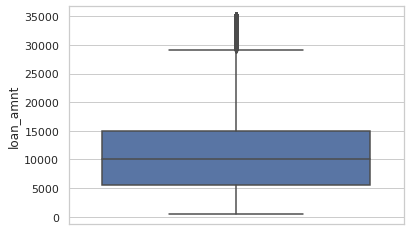

In [96]:
sns.set(style="whitegrid")
sns.boxplot(y=df.loan_amnt)

In [97]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.963300e+04,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,3.963300e+04,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,39633.000000,38937.000000
mean,8.505441e+05,11225.515353,10953.430853,10404.675689,0.120173,324.721103,6.901247e+04,13.318316,0.146267,0.868292,12.044534,9.298287,0.055005,13397.305553,0.486598,22.100724,51.336462,51.097838,12175.618293,11588.250434,9812.127455,2267.820503,1.365904,94.304512,12.299525,2684.297829,0.043198
std,2.657160e+05,7455.337318,7185.759778,7128.607170,0.037247,208.833545,6.384216e+04,6.677228,0.491169,1.069715,21.972346,4.400195,0.237106,15894.461113,0.287642,11.400749,375.562797,374.213029,9036.709284,8938.236885,7059.807662,2608.663170,7.297430,685.618852,148.352482,4450.175844,0.204188
min,7.069900e+04,500.000000,500.000000,0.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.668720e+05,5500.000000,5400.000000,5000.000000,0.092500,167.080000,4.050000e+04,8.190000,0.000000,0.000000,-1.000000,6.000000,0.000000,3711.000000,0.253000,14.000000,0.000000,0.000000,5594.008440,5138.680000,4648.890000,665.160000,0.000000,0.000000,0.000000,219.860000,0.000000
50%,8.508800e+05,10000.000000,9600.000000,8975.000000,0.118300,280.610000,5.900000e+04,13.410000,0.000000,1.000000,-1.000000,9.000000,0.000000,8862.000000,0.492000,20.000000,0.000000,0.000000,9930.508634,9308.160000,8000.000000,1353.290000,0.000000,0.000000,0.000000,548.660000,0.000000
75%,1.047368e+06,15000.000000,15000.000000,14400.000000,0.145900,430.780000,8.240400e+04,18.600000,0.000000,1.000000,21.000000,12.000000,0.000000,17076.000000,0.723000,29.000000,0.000000,0.000000,16553.741870,15815.910000,13703.960000,2838.130000,0.000000,0.000000,0.000000,3307.040000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,0.999000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


DIGGING DEEPER ON ANNUAL INCOME
<BR>--out_prncp	out_prncp_inv<br>	total_pymnt	total_pymnt_inv	total_rec_prncp	total_rec_int,revol_bal

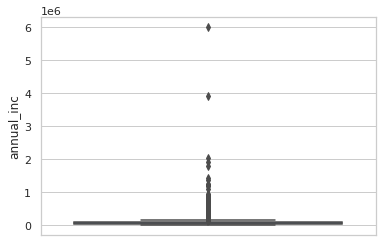

In [98]:
sns.set(style="whitegrid")
sns.boxplot(y=df.annual_inc)

In [99]:
df.total_pymnt.quantile([0,0.001,0.01,.025,.05,.1, .25, .5, .75,.975 ,.99,1],)

0.000       33.730000
0.001      202.011200
0.010      851.378800
0.025     1288.413729
0.050     1940.316000
0.100     3003.606592
0.250     5594.008440
0.500     9930.508634
0.750    16553.741870
0.975    35502.336006
0.990    42222.797961
1.000    58563.679930
Name: total_pymnt, dtype: float64

In [100]:
df.annual_inc.quantile([0,0.001,0.01,.025,.05,.1, .25, .5, .75,.975 ,.99 ,1],)

0.000       4000.000
0.001       8407.584
0.010      14400.000
0.025      19200.000
0.050      24000.000
0.100      30000.000
0.250      40500.000
0.500      59000.000
0.750      82404.000
0.975     175000.000
0.990     235000.000
1.000    6000000.000
Name: annual_inc, dtype: float64

In [0]:
df = df[df.annual_inc.between(df.annual_inc.quantile(0), df.annual_inc.quantile(.99))]

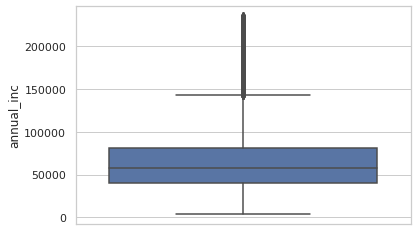

In [102]:
sns.set(style="whitegrid")
sns.boxplot(y=df.annual_inc)



##UNIVARIATE ANALYSIS


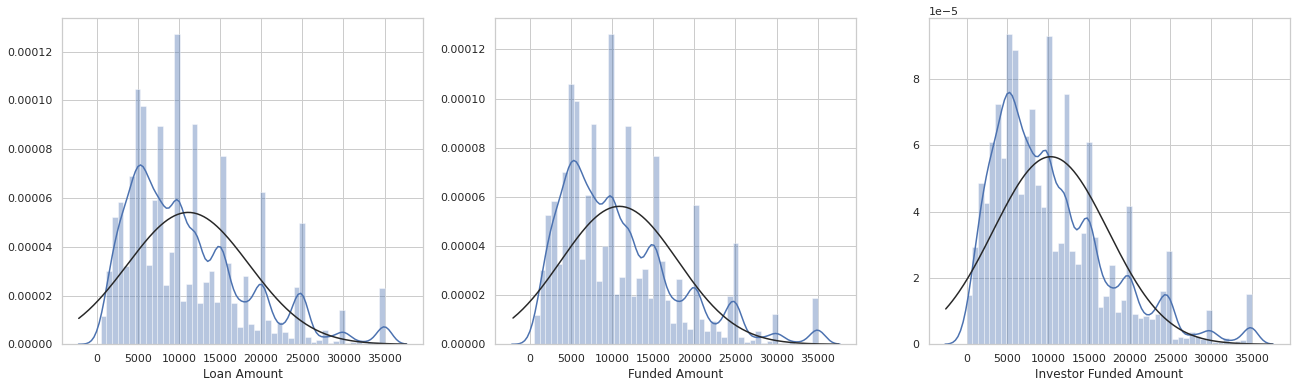

In [110]:
plt.subplots(figsize=(22,6)) 
plt.subplot(1,3,1)
sns.distplot(df.loan_amnt,fit = norm)
plt.xlabel('Loan Amount')
plt.subplot(1,3,2)
sns.distplot(df.funded_amnt,fit = norm )
plt.xlabel('Funded Amount')
plt.subplot(1,3,3)
sns.distplot(df.funded_amnt_inv,fit = norm)
plt.xlabel('Investor Funded Amount')
plt.show()

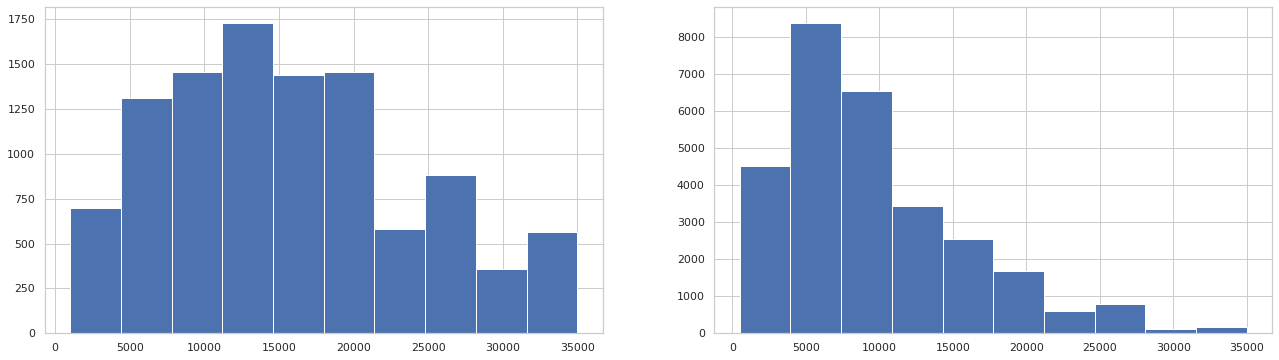

In [109]:
plt.subplots(figsize=(22,6)) 
plt.subplot(1,2,1)
df[df.term == '60 months'].loan_amnt.hist()
plt.subplot(1,2,2)
df[df.term == '36 months'].loan_amnt.hist()
plt.show()

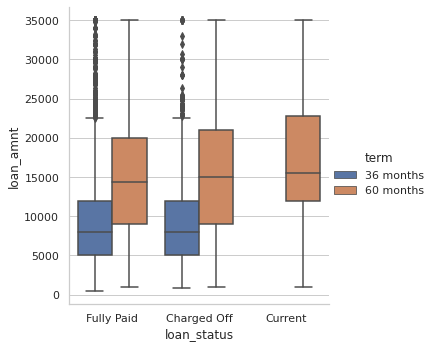

In [116]:
sns.catplot(x="loan_status", y="loan_amnt", hue="term", kind="box", data=df);

In [0]:
pd.crosstab(index=  [df.verification_status],columns = df.loan_status, values= df.loan_amnt , aggfunc ='count' , normalize= 'index'  )

Checking impact  of loan amount 

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.loan_amnt , x= df.loan_status)

Loan amount doesnt seem to have major impact on status , although loan amount is more varied in case of charged off loans.

LETS OBSERVE IMPACT OF ANNUAL INCOME ON LOAN STATUS

In [0]:
df.annual_inc.describe()

In [0]:
df.annual_inc.hist()

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.annual_inc , x= df.loan_status)

the annual income seems to be on the lower side in case of charged off loans

CHECKING THE IMPACT OF dti on LOAN STATUS

In [0]:
df.dti.describe()

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.dti , x= df.loan_status) 

CHECKING THE IMPACT OF LAST 6 MONTHS ENQUIRY on LOAN STATUS

In [0]:
df.inq_last_6mths.hist()

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.inq_last_6mths , x= df.loan_status) 

chances of loan being charged off seems to increase with increase in enquiries

checking impact of interest rate

In [0]:
df.int_rate.describe()

In [0]:
df.int_rate.hist()

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.int_rate , x= df.loan_status) 

Increase in intrest rate  increases the chances of loan being charged off

checking impact of utilization rate

In [0]:
df.revol_util.hist()

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.revol_util , x= df.loan_status) 

Increase in utilization of revolving line  increases the chances of loan being charged off

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.total_pymnt , x= df.loan_status) 

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.total_pymnt , x= df.loan_status) 

In [0]:
#df.groupby(['grade','loan_status'])['loan_amnt'].describe()
pd.crosstab(index = [df.grade] , columns = df.loan_status , values = df.loan_amnt, aggfunc = 'count' , normalize= 'index')

In [0]:
pd.crosstab([df.purpose],df.loan_status,values=df.loan_amnt,aggfunc='count',
           normalize='index')

In [0]:
pd.crosstab([df.addr_state],df.loan_status,values=df.loan_amnt,aggfunc='count' ,normalize= 'index')

##BIVARIATE ANALYSIS

In [0]:

pd.crosstab(index = [df.term] , columns = df.loan_status , values = df.loan_amnt, aggfunc = 'count' , normalize= 'index')

In [0]:
pd.crosstab(index = [df.term ,df.grade] , columns = df.loan_status , values = df.loan_amnt, aggfunc = 'count' , normalize= 'index')

In [0]:
pd.crosstab(index = [df.grade,df.sub_grade] , columns = [df.loan_status,df.term ] , values = df.loan_amnt, aggfunc = 'count' , normalize= 'index')

In [0]:
df.groupby(['home_ownership','loan_status'])['loan_amnt'].describe()

In [0]:
pd.crosstab(index=  [df.term,df.home_ownership],columns = df.loan_status, values= df.loan_amnt , aggfunc ='count' , normalize= 'index'  )

In [0]:
#pd.crosstab(index= [df.verification_status ] ,columns= [df.loan_status] , values= df.loan_amnt ,aggfunc= 'count',normalize= 'index')

In [0]:
pd.crosstab(index= [df.verification_status,df.home_ownership,df.term ] ,columns= [df.loan_status] , values= df.loan_amnt ,aggfunc= 'count',normalize= 'index')

In [0]:
pd.crosstab([df.purpose ,df.term ],[df.loan_status],values=df.loan_amnt,aggfunc='count',
           normalize='index')

Long term loans for vacation , education ,small business ,credit card or for no reasons is a bad idea

In [0]:
rs = np.random.RandomState(0)
cor = df[['annual_inc','collection_recovery_fee','dti','inq_last_6mths','installment','last_pymnt_amnt','loan_amnt','open_acc','out_prncp','out_prncp_inv','pub_rec','pub_rec_bankruptcies','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']].corr()
cor.style.background_gradient(cmap='coolwarm')

In [0]:
pd.crosstab([df.purpose],df.loan_status,values=df.loan_amnt,aggfunc='count',
           normalize='index')

In [0]:
plt.scatter(x=df.annual_inc, y=df.loan_amnt)

deriving a metric -length of description

Lets check if length of description has any effect on the outcome

In [0]:
df['desc_len'] = df.desc.apply(lambda c :len(c))

In [0]:
df.desc_len.describe()

In [0]:
df.desc_len.quantile([.1, .25, .5, .75,.80,.90,.95]) 

In [0]:
df['desc_len_bin'] = pd.qcut(df.desc_len, 200, labels=False,duplicates = 'drop')

In [0]:

pd.crosstab([df.desc_len_bin],df.loan_status,values=df.loan_amnt,aggfunc='count',
           normalize='index')

Binning Interest rates into quartiles

In [0]:
df.int_rate.quantile([0.25,0.5,0.75,1])

In [0]:
df['interest_bin'] = pd.qcut(df.int_rate, 4, labels=['<0.09' , '<.12' , '<.15' , '<.25'],duplicates = 'drop')

In [0]:
pd.crosstab([df.interest_bin],df.loan_status,values=df.loan_amnt,aggfunc='count',
           normalize='index')

As the interest rates grow higher the chances of charging off  the loan increases.

In [0]:
pd.crosstab([df.emp_length , df.interest_bin ],df.loan_status,values=df.loan_amnt,aggfunc='count',
           normalize='index')

In [0]:
pd.crosstab([df.grade , df.interest_bin ],df.loan_status,values=df.loan_amnt,aggfunc='count',
           normalize='index')

In [0]:
df.open_acc.quantile([0, .1,.2,0.3 ,.4,.5,.6, .7,.8,0.99,1])

In [0]:
df['open_acc_bin'] = pd.qcut(df.open_acc, 10, labels=False,duplicates = 'drop')

In [0]:
df60 = df[df.term == '60 months']

CHECK ON FICO SCORE 

In [0]:
df['fico']=df.desc.apply(lambda x : 1 if re.search('fico' ,x ) else 0 )

In [0]:
#df[df.fico == 1]
pd.crosstab([df.fico  ],df.loan_status,values=df.loan_amnt,aggfunc='count',
           normalize='index')

In [0]:
dff =df[df.fico == 1]
pd.crosstab([dff.purpose  ],dff.loan_status,values=dff.loan_amnt,aggfunc='count',
           normalize='columns')

Higher chances of loan getting charged off if fico is mentioned on desc<br>
The cases where charged off is higher are mostly(~88%) debt consolidation/other when Fico is mentioned.

DTI Score analysis

In [0]:
df.dti.describe()

In [0]:
df.dti.quantile([0,.2,.4,.6, .8,1])

In [0]:
df['dti_bin'] = pd.qcut(df.dti, 4, labels=False,duplicates = 'drop')
pd.crosstab([df.dti_bin],df.loan_status,values=df.loan_amnt,aggfunc='count',normalize= 'index')

As Dti increases , there is a slight increase in loan chared off

In [0]:
df['pub_rec_exists']= df.pub_rec.apply(lambda x: 1 if x>0 else 0)
pd.crosstab([df.pub_rec_exists],df.loan_status,values=df.loan_amnt,aggfunc='count',normalize= 'index')

In [0]:
pd.crosstab([df.pub_rec_bankruptcies ,df.pub_rec_exists ],df.loan_status,values=df.loan_amnt,aggfunc='count',normalize= 'index')

The chances of loan charge off is higher if banrupsies are present , even where no bankrupsy , any public record will increase chances of loan getting wrtten off